In [1]:
import chokozainerrl
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
%matplotlib inline
thisdir='../../draft/OpenAI/Breakout/result_a2c_ale_draft'
MyProgram=chokozainerrl.train_a2c_ale

In [2]:
#@title Configuration
args=MyProgram.make_args([])

args.mode = 'check' #@param ["check", "train"]
args.outdir=thisdir #@param{type:"string"}
args.gpu=-1 #@param{type:"integer"}
args.env = "BreakoutNoFrameskip-v4" #@param ["BreakoutNoFrameskip-v4","BreakoutNoFrameskip-v4"]{allow-input: true}
args.save_mp4=thisdir+'/pretrain.mp4'#@param{type:"string"}


test episode: 0 R: 0.0
test episode: 1 R: 0.0
test episode: 2 R: 0.0


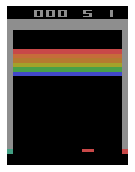

In [3]:
from IPython.display import HTML
anim=MyProgram.main(args)
HTML(anim.to_jshtml())

#学習の時間推定
DQN (Deep Q Learning)

右のテーブルを変更すると、左に反映されます。
時間推定のために10000ステップくらいやってみます。

In [6]:
#@title Configuration
args=chokozainerrl.train_double_iqn_ale.make_args([])

args.mode = 'train' #@param ["check", "train"]
args.env = "BreakoutNoFrameskip-v4" #@param ["BreakoutNoFrameskip-v4","BreakoutNoFrameskip-v4"]{allow-input: true}
args.outdir=thisdir+'_precheck' #@param{type:"string"}
args.gpu=-1 #@param{type:"integer"}
args.log_type="pbar"#@param["pbar","full_stream"]{allow-input: true}

args.steps=10000 #@param{type:"integer"}
args.checkpoint_freq=10000 #@param{type:"integer"}
args.eval_interval=10000 #@param{type:"integer"}
args.eval_n_runs=1 #@param{type:"integer"}



##Test Train
訓練開始です。

In [7]:
chokozainerrl.train_double_iqn_ale.main(args)


Start


KeyboardInterrupt: 

#学習
DQN (Deep Q Learning)
 
右のテーブルを変更すると、左に反映されます。

In [0]:
#@title Configuration
args=chokozainerrl.train_double_iqn_ale.make_args([])

args.mode = 'train' #@param ["check", "train"]
args.env = "BreakoutNoFrameskip-v4" #@param ["BreakoutNoFrameskip-v4","BreakoutNoFrameskip-v4"]{allow-input: true}
args.outdir=thisdir #@param{type:"string"}
args.gpu=0 #@param{type:"integer"}
args.load_agent=None #@param{type:"string"}
args.log_type="pbar"#@param["pbar","full_stream"]{allow-input: true}
args.arch='doubledqn'#@param['nature', 'nips', 'dueling', 'doubledqn']
args.agent='DoubleDQN'#@param['DQN', 'DoubleDQN', 'PAL']

args.steps=10000000 #@param{type:"integer"}
args.step_offset=0 #@param{type:"integer"}
args.checkpoint_frequency=500000 #@param{type:"integer"}
args.max_frames=30 * 60 * 60 #@param{type:"integer"}
args.eval_interval=100000 #@param{type:"integer"}
args.eval_n_runs=10 #@param{type:"integer"}

args.seed=0 #@param{type:"integer"}
args.final_exploration_frames=1000000 #@param{type:"integer"}
args.final_epsilon=0.01 #@param{type:"number"}
args.eval_epsilon=0.001 #@param{type:"number"}
args.noisy_net_sigma=None #@param{type:"number"}
args.replay_start_size=50000 #@param{type:"integer"}
args.target_update_interval=30000 #@param{type:"integer"}
args.update_interval=4 #@param{type:"integer"}
args.lr=2.5e-4 #@param{type:"number"}



##Train
訓練開始です。

In [0]:
chokozainerrl.train_double_iqn_ale.main(args)


##Result
学習結果の表です。

In [0]:
chokozainerrl.show_result.table(args.outdir+'/scores.txt')

学習結果のグラフです。

In [0]:
chokozainerrl.show_result.graph(args.outdir+'/scores.txt','steps','average_q')

#学習後の表示

In [0]:
#@title Configuration
args=chokozainerrl.train_dqn_ale.make_args([])

args.mode = 'growth' #@param ["check", "train","growth"]
args.outdir=thisdir #@param{type:"string"}
args.env = "BreakoutNoFrameskip-v4" #@param ["BreakoutNoFrameskip-v4","Breakout-ram-v0"]{allow-input: true}
args.gpu=0 #@param{type:"integer"}
args.save_mp4=thisdir+'/posttrain.mp4'#@param{type:"string"}


##Evaluation
学習済みのデータを用いて、３回試行した結果が表示されます。動画は、outdir+'/test.mp4'に出力されます。

In [0]:
from IPython.display import HTML
anim=chokozainerrl.train_dqn_ale.main(args)
HTML(anim.to_jshtml())